In [39]:
!pip install CoolProp

In [40]:
from CoolProp.CoolProp import PropsSI

### Effect of efficiency on nozzle exit velocity

In [41]:
fluid = 'air'

p1_kPa = 200
p1_Pa = p1_kPa*1000
T1_K = 950
p2_kPa = 110
p2_Pa = p2_kPa*1000

eta = 0.92 # nozzle efficiency

In [42]:
s1_JperKgperK = PropsSI('S','P',p1_Pa,'T',T1_K,fluid) # ; print(s1_JperKgperK)
h1_JperKg = PropsSI('H','P',p1_Pa,'T',T1_K,fluid) # ; print(s1_JperKgperK)
s2_JperKgperK = s1_JperKgperK

T2_K = PropsSI('T','P',p2_Pa,'S',s2_JperKgperK,fluid) #; print(h2_JperKg)
h2_JperKg = PropsSI('H','P',p2_Pa,'T',T2_K,fluid) # ; print(s1_JperKgperK)

In [43]:
# h2a_JperKg = (() + eta*h1_JperKg)/eta
# h2a_JperKg = ((h2_JperKg - h1_JperKg)/eta)+h1_JperKg

h2a_JperKg = -((h1_JperKg - h2_JperKg)*eta -h1_JperKg)

s2a_JperKgperK = PropsSI('S','P',p2_Pa,'H',h2a_JperKg,fluid)
T2a_K = PropsSI('T','P',p2_Pa,'H',h2a_JperKg,fluid)

# T2a_K = PropsSI('T','P',p2_Pa,'S',s2a_JperKgperK,fluid)

In [44]:
import CoolProp
from CoolProp.Plots import PropertyPlot

import numpy as np
import matplotlib.pyplot as plt

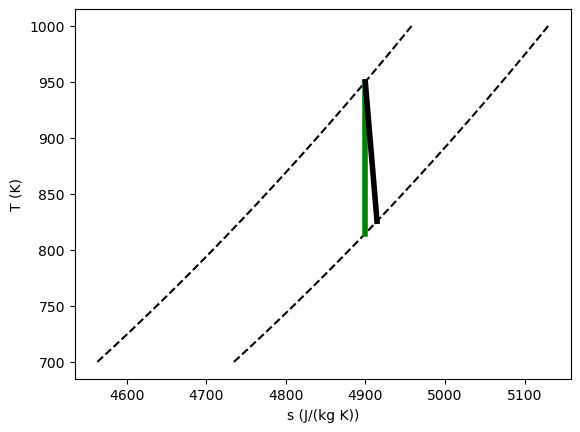

In [45]:
plt.figure()
plt.clf()
T = np.linspace(700, 1000, 500) # range of temperatures
for P in [p1_Pa, p2_Pa]: 
    S = [PropsSI('S','P',P,'T',t,fluid) for t in T]
    plt.plot(S, T, 'k--')
    
# saturated vapor and liquid entropy lines
# Tsat = np.linspace(217, 304, 1000) # range of temperatures
# svap = [PropsSI('S','T',t,'Q',1,fluid) for t in Tsat]
# sliq = [PropsSI('S','T',t,'Q',0,fluid) for t in Tsat]

# plt.plot(svap, Tsat, 'k-')
# plt.plot(sliq, Tsat, 'k-')

plt.xlabel('s (J/(kg K))')
plt.ylabel('T (K)')
# plt.savefig('carbonDioxideRefrigerationTS.png')

plt.plot([s1_JperKgperK, s2_JperKgperK], [T1_K, T2_K], 'g-', lw=4) # Process 1
plt.plot([s1_JperKgperK, s2a_JperKgperK], [T1_K, T2a_K], 'k-', lw=4) # Process 1

#plt.savefig('multistageCompression.eps', format='eps')
# plt.savefig('multistageCompression.png', format='png')

In [46]:
T2_K

814.6379762882094

In [47]:
T2a_K

825.6043381180085